In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df_copy=df_train.drop(['Survived'], axis=1)
total_set = pd.concat([train_df_copy, df_test])
total_set.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [11]:
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
train_data= df_train.copy()
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Feature 분석!!!! 설렌다

In [13]:
total_set.isnull().sum() # 결측 데이터 체크

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
total_set.isnull().sum()/len(total_set) # 결측 데이터 비율

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

### 예) Age 누락 데이터를 채우기( 최빈값, 평균값*, 중앙값*)
###      or 행 삭제
###      문자데이터 같은 경우에는 최빈값으로 설정 해준다.

In [15]:
total_set.drop('Cabin', axis=1, inplace=True)
total_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


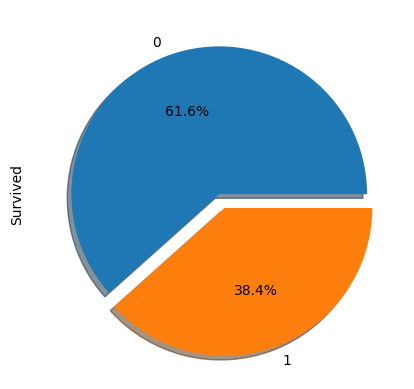

In [16]:
#전체 생존률
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

In [17]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
df_train.loc[(df_train["Sex"]=='male') & (df_train["Survived"]==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [23]:
len(df_train.loc[(df_train["Sex"]=='male') & (df_train["Survived"]==1)])/len(df_train.loc[df_train["Sex"]=='female'])

0.3471337579617834

In [24]:
total_set["Sex"].unique()

array(['male', 'female'], dtype=object)

# 문자열을 숫자형으로 바꿔주기


In [42]:
# train_data['Sex'] = train_data['Sex'].apply(lambda s : 1 if s=='female' else 0)
total_set["Sex"].replace({'male':0, 'female':1}, inplace = True)
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S


In [27]:
total_set["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [37]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


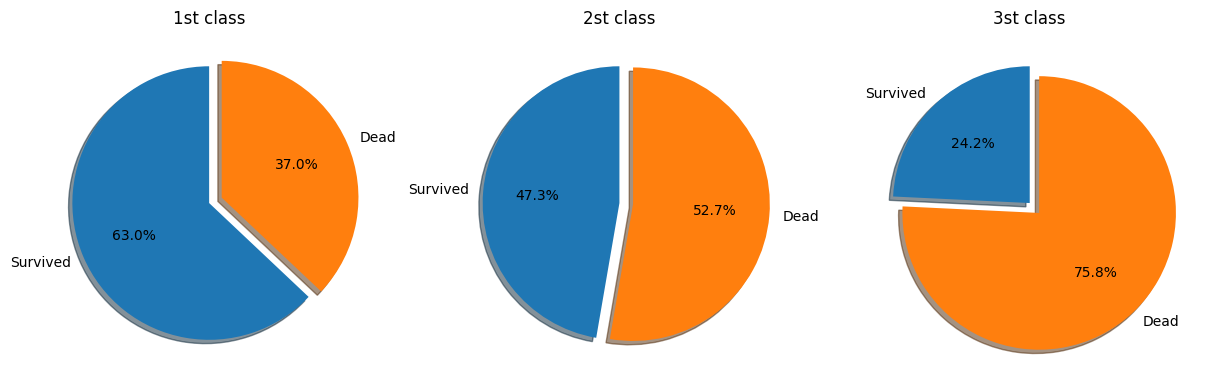

In [39]:
labels='Survived', 'Dead'
sizes_1=[len(train_data.loc[ (train_data["Pclass"]==1)&(train_data["Survived"]==1)]),
         len(train_data.loc[ (train_data["Pclass"]==1)&(train_data["Survived"]==0)])
        ]
sizes_2=[len(train_data.loc[ (train_data["Pclass"]==2)&(train_data["Survived"]==1)]),
         len(train_data.loc[ (train_data["Pclass"]==2)&(train_data["Survived"]==0)])
        ]
sizes_3=[len(train_data.loc[ (train_data["Pclass"]==3)&(train_data["Survived"]==1)]),
         len(train_data.loc[ (train_data["Pclass"]==3)&(train_data["Survived"]==0)])
        ]

explode=(0,0.1)
fig=plt.figure()
fig.set_size_inches(15,5)
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('2st class')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title('3st class')

plt.show()

In [43]:
pd.crosstab([train_data.Pclass, train_data.Sex], train_data.Survived, margins=True).style.background_gradient(cmap='summer_r')

In [44]:
total_set["Age"].isnull().sum()

263

In [45]:
total_set["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [49]:
total_set.groupby(['Pclass', 'Sex'])["Age"].mean()

Pclass  Sex
1       0      41.029272
        1      37.037594
2       0      30.815380
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64

# Age 데이터 누락 데이터를 평균값으로 변경하기

In [50]:
total_set["Age"].fillna(total_set.groupby(['Pclass', 'Sex'])["Age"].transform("mean"), inplace= True)

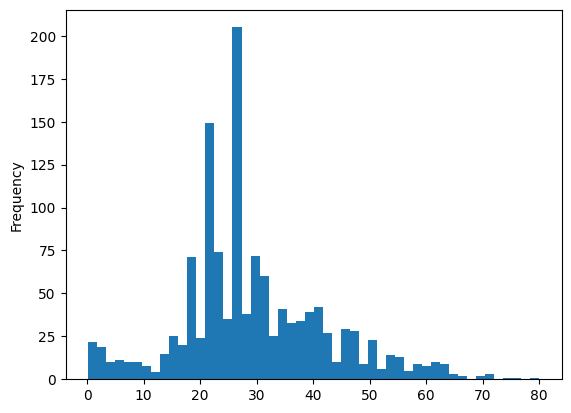

In [51]:
total_set["Age"].plot.hist(bins=50)
plt.show()

In [52]:
total_set.drop('Age', axis=1, inplace =True)
total_set.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S


In [53]:
# Sibsp => Brother and Sister, Spouse : husband and wifr
total_set["SibSp"].value_counts()


0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [54]:
# Parch =>number of parents/ childern aboard the Titanic
total_set["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

In [55]:
total_set['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [57]:
total_set.loc[total_set["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",0,0,0,3701,NaN,S


In [58]:
# total_set["Age"].fillna(total_set.groupby(['Pclass', 'Sex'])["Age"].transform("mean"), inplace= True)
total_set['Fare'].fillna(total_set['Fare'].mean(), inplace = True)

In [59]:
total_set.loc[total_set["Fare"].isnull()]


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked


Text(0.5, 1.0, 'Fares of 3st class')

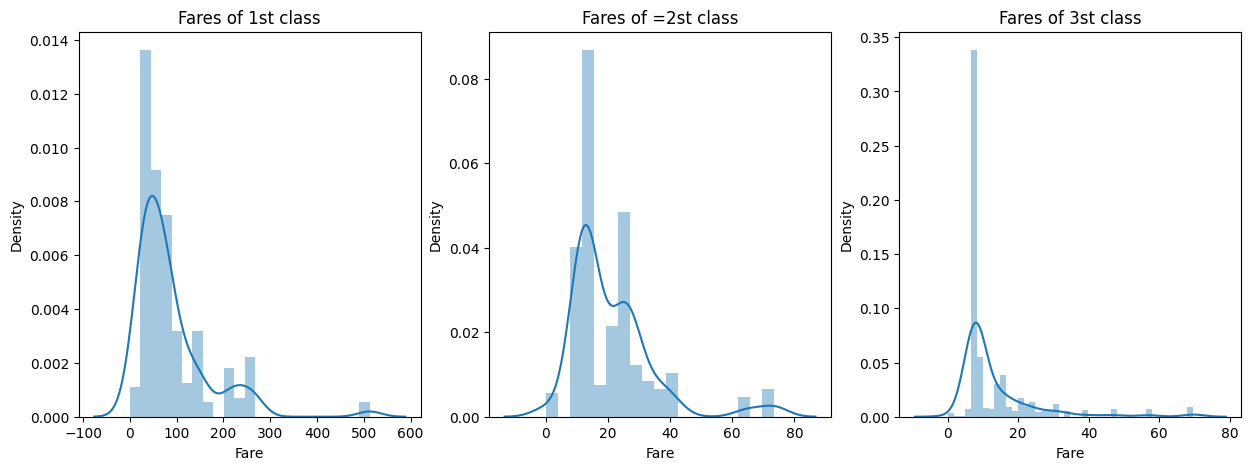

In [60]:
f, ax =plt.subplots(1,3,figsize=(15,5))
sns.distplot(total_set[total_set['Pclass']==1]['Fare'], ax = ax[0])
ax[0].set_title("Fares of 1st class")

sns.distplot(total_set[total_set['Pclass']==2]['Fare'], ax = ax[1])
ax[1].set_title("Fares of =2st class")

sns.distplot(total_set[total_set['Pclass']==3]['Fare'], ax = ax[2])
ax[2].set_title("Fares of 3st class")

In [62]:
[total_set[total_set['Pclass']==1]['Fare'].mean(),
 total_set[total_set['Pclass']==2]['Fare'].mean(),
 total_set[total_set['Pclass']==3]['Fare'].mean()]

[87.50899164086688, 21.1791963898917, 13.33108699475507]

In [63]:
total_set.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [64]:
total_set.drop('Ticket', axis=1, inplace = True)
total_set.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,0,0,8.0500,S


In [68]:
total_set['Embarked'].value_counts()  # S가 제일 많네 최빈값

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [66]:
total_set.loc[total_set['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
61,62,1,"Icard, Miss. Amelie",1,0,0,80.0,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,0,0,80.0,NaN


In [67]:
total_set['Embarked'].fillna('S', inplace=True)

In [69]:
total_set['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [71]:
pd.crosstab([total_set.Pclass, total_set.Sex], total_set.Embarked, margins=True).style.background_gradient(cmap='summer_r')

In [72]:
total_set['Embarked'].replace(["S","C","Q"],[0,1,2], inplace = True)

In [73]:
total_set

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,0
4,5,3,"Allen, Mr. William Henry",0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0,0,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0,0,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0,0,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,0,0,8.0500,0


In [74]:
total_set.drop('Name', axis=1, inplace = True)
total_set

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,3,0,1,0,7.2500,0
1,2,1,1,1,0,71.2833,1
2,3,3,1,0,0,7.9250,0
3,4,1,1,1,0,53.1000,0
4,5,3,0,0,0,8.0500,0
...,...,...,...,...,...,...,...
413,1305,3,0,0,0,8.0500,0
414,1306,1,1,0,0,108.9000,1
415,1307,3,0,0,0,7.2500,0
416,1308,3,0,0,0,8.0500,0
